Instructions for updating:
non-resource variables are not supported in the long term
Epoch:  0 ; Error: 126.1654721581335
Test error = 200.89946285475366
8 / 46  right
Epoch:  100 ; Error: 6.547359999066614
Test error = 9.728678101486993
35 / 46  right
Epoch:  200 ; Error: 5.668565333876778
Test error = 7.89262300801837
35 / 46  right
Epoch:  300 ; Error: 4.853006978224508
Test error = 6.133232850310452
35 / 46  right
Epoch:  400 ; Error: 4.110276107009182
Test error = 4.4745096697911695
38 / 46  right
Epoch:  500 ; Error: 3.4774660210197865
Test error = 2.9716602603888336
38 / 46  right
Epoch:  600 ; Error: 3.1186396938097816
Test error = 1.921035468805564
38 / 46  right
Epoch:  700 ; Error: 3.014719197441566
Test error = 1.5264498685177765
38 / 46  right
Epoch:  800 ; Error: 2.973567287152895
Test error = 1.4085036295367759
38 / 46  right
Epoch:  900 ; Error: 2.93760020590425
Test error = 1.3684296210316722
38 / 46  right
Epoch:  1000 ; Error: 2.902096373779274
Test error = 1.3495306

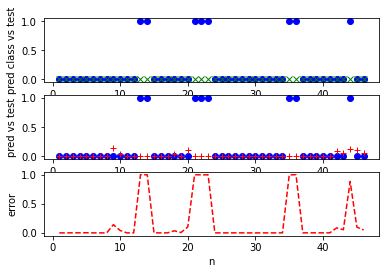

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
total_features, total_prices = load_boston(True)

ideal_prise = sum(total_prices)/len(total_prices)

train_features = total_features[:460, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
train_class = np.array([[1.0 if i >= ideal_prise else 0.0] for i in total_prices[:460]])

test_features = total_features[460:, [0,1,2,3,4,5,6,7,8,9,10,11,12]]
test_class = np.array([[1.0 if i >= ideal_prise else 0.0] for i in total_prices[460:]])

num_features = 13
w = tf.Variable(np.random.rand(num_features,1), dtype=tf.float64)
b = tf.Variable(tf.zeros(1, dtype=tf.float64))
learning_rate = 0.00003
epochs = 3000

#calculate logits
def calc_logits(x):
    return tf.add(b, tf.matmul(x, w))

#calculate predictions
def calc_predictions(x):
    predictions = tf.nn.sigmoid(calc_logits(x))
    return predictions

#calculate error
def calc_error(x,targets):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=calc_logits(x),
                                                                  labels=targets))
    
error = calc_error(train_features, train_class)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

points = [[],[],[]]
points_test = [[],[],[],[]]
points_test_err =[[],[]]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    test_error1 = sess.run(calc_error(test_features, test_class))
    i = 0
    for i in list(range(epochs)):
        _error, _train_step = sess.run([error, optimizer])
        if i % 100 == 0:
            print('Epoch: ', i, '; Error:', _error)
            
            #тестирование модели после обучения
            predictions, test_error = sess.run([calc_predictions(test_features), calc_error(test_features, test_class)])

            predictions_classes = []
            right = 0

            for j in range(len(predictions)):
                predictions_classes.append(1.0 if predictions[j] > 0.5 else 0.0)
                if np.allclose(predictions_classes[j], test_class[j]):
                    right += 1
                    
            print('Test error =', test_error)
            print(right, '/', len(predictions), ' right')

    for i in range(len(test_class)):
        err = abs(test_class[i] - predictions[i])
        points_test_err[0].append(i + 1)
        points_test_err[1].append(err)
        points_test[0].append(i + 1)
        points_test[1].append(test_class[i])
        points_test[2].append(predictions[i])
        points_test[3].append(predictions_classes[i])

    plt.subplot(3, 1, 1)
    plt.plot(points_test[0], points_test[1], 'bo') #test_class
    plt.plot(points_test[0], points_test[3], 'gx') #predictions_classes
    plt.ylabel('pred class vs test')

    plt.xlabel('n')

    plt.subplot(3, 1, 2)
    plt.plot(points_test[0], points_test[1], 'bo') #test_class
    plt.plot(points_test[0], points_test[2], 'r+') #predictions
    plt.ylabel('pred vs test')
    plt.xlabel('n')

    plt.subplot(3, 1, 3)
    plt.plot(points_test_err[0], points_test_err[1], 'r--')
    plt.xlabel('n')
    plt.ylabel('error')
    plt.show()



